In [1]:
import pandas as pd
import numpy as np
problem_data=pd.read_csv("problem_data.csv")
train=pd.read_csv("train_submissions.csv")
user_data=pd.read_csv("user_data.csv")

In [52]:
test=pd.read_csv("test_submissions.csv")

In [2]:
#merging the data from different datasheets
train=pd.merge(train,problem_data[['problem_id','level_type','tags']],on='problem_id',how='left')

In [3]:
train.head()

,user_id,problem_id,attempts_range,level_type,tags
0,user_232,prob_6507,1,B,strings
1,user_3568,prob_2994,3,C,"brute force,dp"
2,user_1600,prob_5071,1,A,implementation
3,user_2256,prob_703,1,A,"brute force,implementation"
4,user_2321,prob_356,1,D,"dfs and similar,trees"


In [4]:
train=pd.merge(train,user_data[['user_id','max_rating','rank']],on='user_id')

In [5]:
train.head()

,user_id,problem_id,attempts_range,level_type,tags,max_rating,rank
0,user_232,prob_6507,1,B,strings,307.913,beginner
1,user_232,prob_5781,1,A,"implementation,math",307.913,beginner
2,user_232,prob_137,2,B,implementation,307.913,beginner
3,user_232,prob_1550,2,A,"brute force,dfs and similar",307.913,beginner
4,user_232,prob_1322,3,B,"dfs and similar,shortest paths",307.913,beginner


In [6]:
#splitting the data in ranks column
rank_dummies = pd.get_dummies(train['rank'], prefix='Rank')
train=pd.concat([train,rank_dummies],axis=1)
train=train.drop(['rank'],axis=1)
train.head()

,user_id,problem_id,attempts_range,level_type,tags,max_rating,Rank_advanced,Rank_beginner,Rank_expert,Rank_intermediate
0,user_232,prob_6507,1,B,strings,307.913,0,1,0,0
1,user_232,prob_5781,1,A,"implementation,math",307.913,0,1,0,0
2,user_232,prob_137,2,B,implementation,307.913,0,1,0,0
3,user_232,prob_1550,2,A,"brute force,dfs and similar",307.913,0,1,0,0
4,user_232,prob_1322,3,B,"dfs and similar,shortest paths",307.913,0,1,0,0


In [7]:
#splitting the data in level column
level_dummies = pd.get_dummies(train['level_type'], prefix='Level')
train=pd.concat([train,level_dummies],axis=1)
train=train.drop(['level_type'],axis=1)
train.head()

,user_id,problem_id,attempts_range,tags,max_rating,Rank_advanced,Rank_beginner,Rank_expert,Rank_intermediate,Level_A,...,Level_E,Level_F,Level_G,Level_H,Level_I,Level_J,Level_K,Level_L,Level_M,Level_N
0,user_232,prob_6507,1,strings,307.913,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,user_232,prob_5781,1,"implementation,math",307.913,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,user_232,prob_137,2,implementation,307.913,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,user_232,prob_1550,2,"brute force,dfs and similar",307.913,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,user_232,prob_1322,3,"dfs and similar,shortest paths",307.913,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#splitting the data in tags column
train=pd.concat([train,train['tags'].str.get_dummies(sep=',')],axis=1)

In [9]:
train.head()

,user_id,problem_id,attempts_range,tags,max_rating,Rank_advanced,Rank_beginner,Rank_expert,Rank_intermediate,Level_A,...,number theory,probabilities,schedules,shortest paths,sortings,string suffix structures,strings,ternary search,trees,two pointers
0,user_232,prob_6507,1,strings,307.913,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,user_232,prob_5781,1,"implementation,math",307.913,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,user_232,prob_137,2,implementation,307.913,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,user_232,prob_1550,2,"brute force,dfs and similar",307.913,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,user_232,prob_1322,3,"dfs and similar,shortest paths",307.913,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [10]:
train=train.drop(['tags'],axis=1)

In [11]:
train.head()

,user_id,problem_id,attempts_range,max_rating,Rank_advanced,Rank_beginner,Rank_expert,Rank_intermediate,Level_A,Level_B,...,number theory,probabilities,schedules,shortest paths,sortings,string suffix structures,strings,ternary search,trees,two pointers
0,user_232,prob_6507,1,307.913,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,user_232,prob_5781,1,307.913,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,user_232,prob_137,2,307.913,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,user_232,prob_1550,2,307.913,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,user_232,prob_1322,3,307.913,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [12]:
train['user_id']=train['user_id'].str.replace('user_','')
train['problem_id']=train['problem_id'].str.replace('prob_','')

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [14]:
#function for calculating the F1 score
def compute_score(y_true, y_pred, average='weighted'):
    xval = f1_score(y_true, y_pred, average=average)
    return np.mean(xval)

In [15]:
X=train[['user_id','problem_id','max_rating','Rank_advanced','Rank_beginner','Rank_expert','Rank_intermediate','Level_A','Level_B','Level_C',
 'Level_D','Level_E','Level_F','Level_G','Level_H','Level_I','Level_J','Level_K','Level_L','Level_M','Level_N','*special','2-sat',
 'binary search','bitmasks','brute force','chinese remainder theorem','combinatorics','constructive algorithms','data structures','dfs and similar',
 'divide and conquer','dp','dsu','expression parsing','fft','flows','games','geometry','graph matchings','graphs','greedy','hashing',
 'implementation','math','matrices','meet-in-the-middle','number theory','probabilities','schedules','shortest paths','sortings','string suffix structures',
 'strings','ternary search','trees','two pointers']]
y=train[['attempts_range']]

In [16]:
#splitting the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.5035708710583827

In [47]:
#calculating the importance of each feature on the attempts_range
features=pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

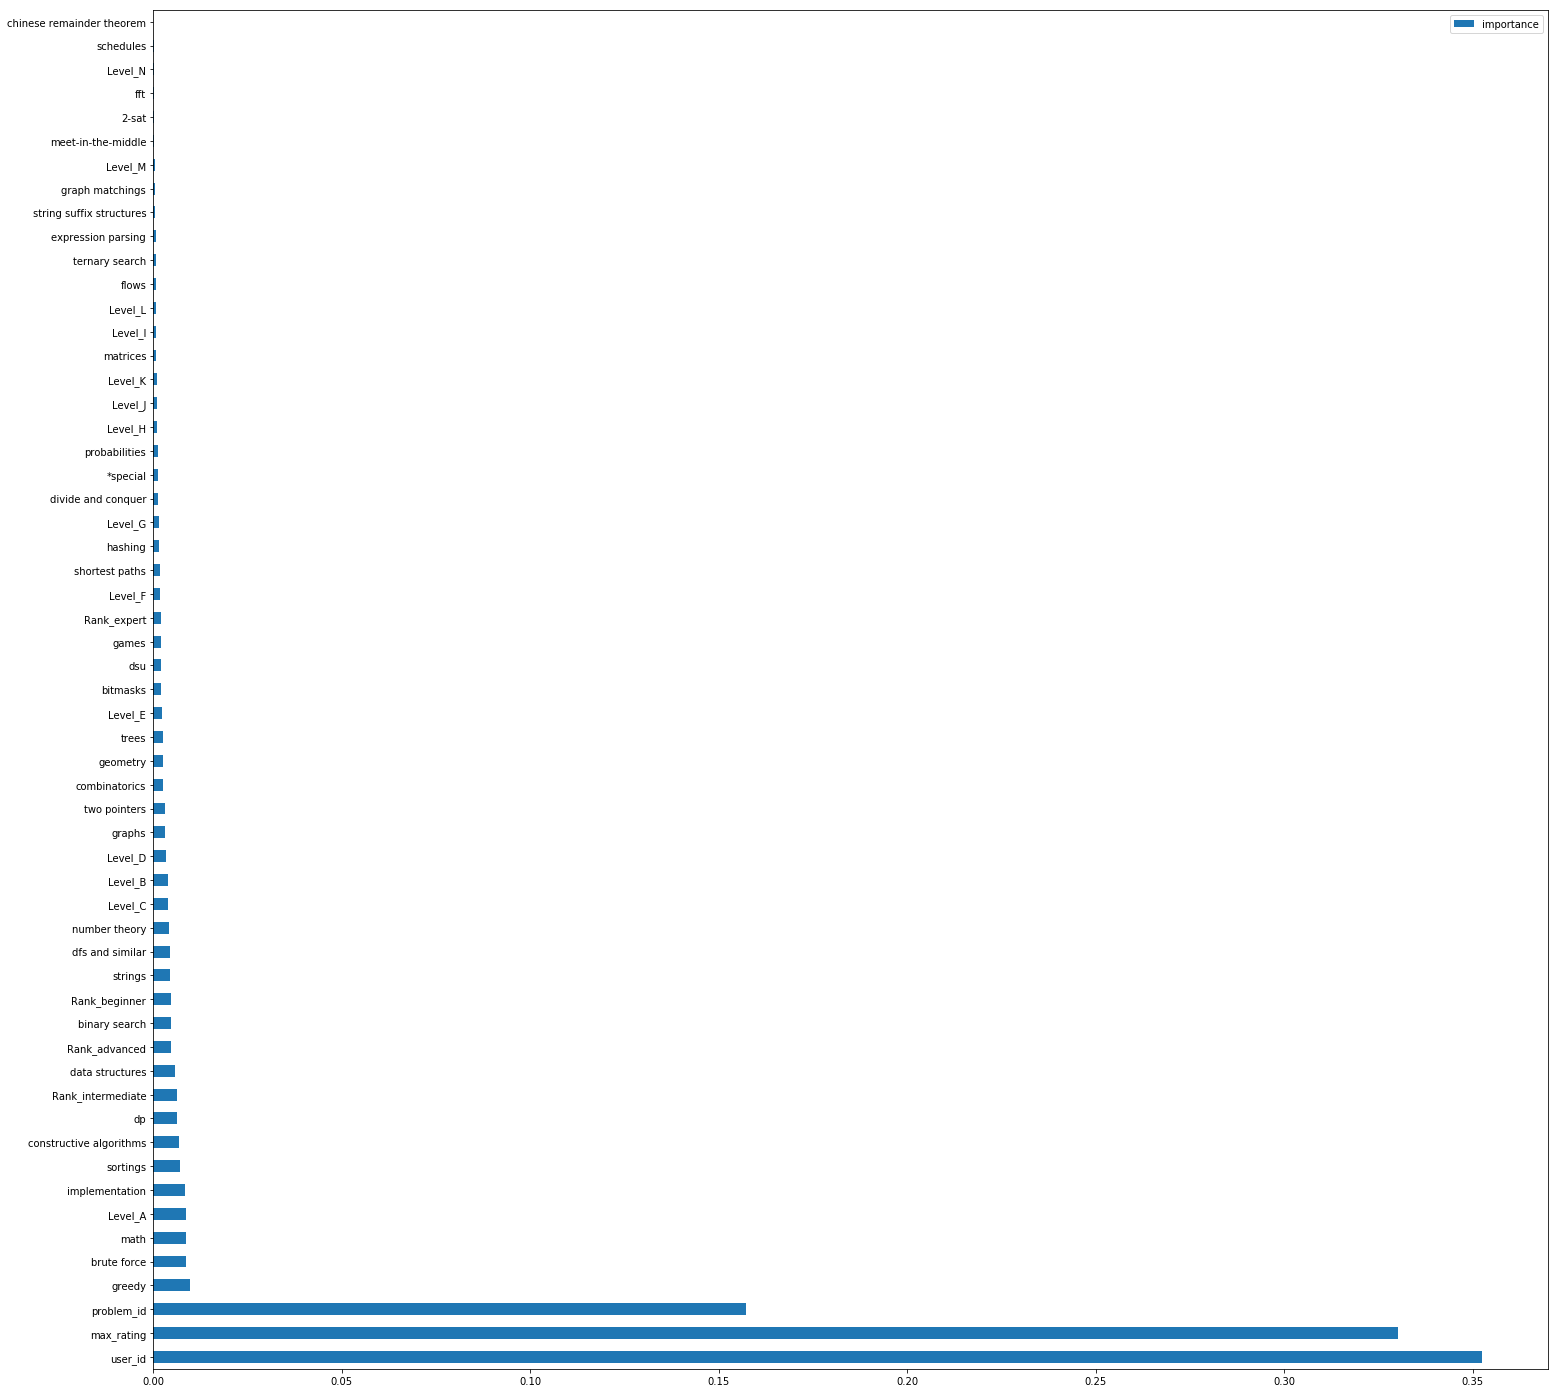

In [48]:
%matplotlib inline
features.plot(kind='barh', figsize=(25, 25))

In [61]:
#making changes to the dataset on the bases of feature's importance
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(X_train)
print (train_reduced.shape)
test_reduced=model.transform(X_test)

(104047, 3)


In [63]:
#Calculating the F1 score
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]
for model in models:
    model=model.fit(train_reduced, y_train)
    prediction=pd.DataFrame(model.predict(test_reduced))
    print ('F1 Score Validation of : {0}'.format(model.__class__))
    score = compute_score(y_true=y_test, y_pred=prediction, average='weighted')
    print ('F1 Score score = {0}'.format(score))
    print ('****')

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score Validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
F1 Score score = 0.3735229684708074
****


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 Score Validation of : <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>
F1 Score score = 0.3735229684708074
****


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


F1 Score Validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
F1 Score score = 0.43016500493050625
****


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score Validation of : <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
F1 Score score = 0.3891285821706229
****


In [64]:
#Since We are getting the highest score in RFC so will go forward with that
rf=rf.fit(train_reduced, y_train)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [66]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66555 entries, 0 to 66554
Data columns (total 3 columns):
ID            66555 non-null object
user_id       66555 non-null object
problem_id    66555 non-null object
dtypes: object(3)
memory usage: 1.5+ MB


In [67]:
#checking for duplicate entries in the test sheet
test= test.drop_duplicates(subset=['ID'])

In [68]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66555 entries, 0 to 66554
Data columns (total 3 columns):
ID            66555 non-null object
user_id       66555 non-null object
problem_id    66555 non-null object
dtypes: object(3)
memory usage: 2.0+ MB


In [76]:
test_prediction_columns=test[['user_id','problem_id']]

In [79]:
test_prediction_columns=pd.merge(test_prediction_columns,user_data[['user_id','max_rating']],on='user_id')

In [80]:
test_prediction_columns['user_id']=test_prediction_columns['user_id'].str.replace('user_','')
test_prediction_columns['problem_id']=test_prediction_columns['problem_id'].str.replace('prob_','')

In [82]:
#making the prediction
output=rf.predict(test_prediction_columns)

In [84]:
test['attempts_range']=output

In [85]:
test.head()

,ID,user_id,problem_id,attempts_range
0,user_856_prob_5822,user_856,prob_5822,1
1,user_2642_prob_2334,user_2642,prob_2334,3
2,user_2557_prob_2920,user_2557,prob_2920,2
3,user_1572_prob_4598,user_1572,prob_4598,1
4,user_295_prob_6139,user_295,prob_6139,2


In [86]:
#saving the results to a csv file
test[['ID','user_id','problem_id','attempts_range']].to_csv('prediction.csv', index=False)